# Simon's Algorithm

In [22]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

from qiskit.providers.ibmq import least_busy

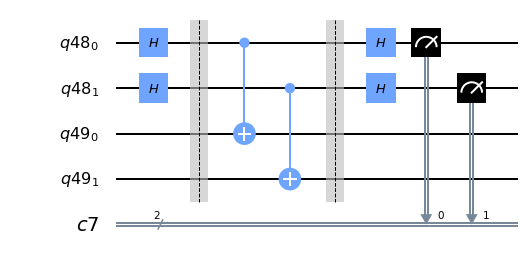

In [43]:
# Number of qubits
n = 2

# Bit key
b = "00"

qr1, qr2 = QuantumRegister(n), QuantumRegister(n)
cr = ClassicalRegister(n)
quantum_circuit = QuantumCircuit(qr1, qr2, cr)

for qubit in range(n):
    quantum_circuit.h(qubit)
quantum_circuit.barrier()

# First create a one-to-one mapping
for qubit in range(n):
    quantum_circuit.cx(qubit, n+qubit)

# Now change it depending on b
# for bit in range(len(b)):
#     if b[bit] == "1":
#         for qubit in range(n):
#             quantum_circuit.cx(bit, n + qubit)
#     else:
#         pass
quantum_circuit.barrier()

for qubit in range(n):
    quantum_circuit.h(qubit)

quantum_circuit.measure(range(n), range(n))

quantum_circuit.draw(output='mpl')

## Function to find dot products

Dot product of two strings of bits is the sum (XOR) of indiviual bits

In [29]:
def bdotz(b, z):
    dotProduct = 0
    for i in range(len(b)):
        dotProduct += int(b[i]) * int(z[i])
    return (dotProduct % 2)

## Simulator

00 . 00 = 0
00 . 01 = 0
00 . 11 = 0
00 . 10 = 0


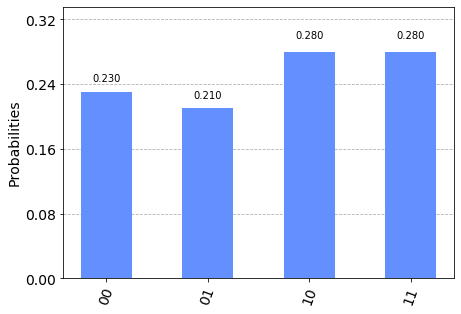

In [49]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(quantum_circuit, backend=simulator, shots=100).result().get_counts()

for z in counts:
    print(f"{b} . {z} = {bdotz(b, z)}")
plot_histogram(counts)

## Quantum Computer

In [25]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
quantumComputer = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("The least busy backend is ", quantumComputer)

ibmqfactory.load_account:WARNING:2020-07-17 20:52:39,641: Credentials are already in use. The existing account in the session will be replaced.
The least busy backend is  ibmq_burlington


In [26]:
from qiskit.tools.monitor import job_monitor
job = execute(quantum_circuit, backend=quantumComputer, shots=1024, optimization_level=3)

job_monitor(job, interval=2)

Job Status: job has successfully run


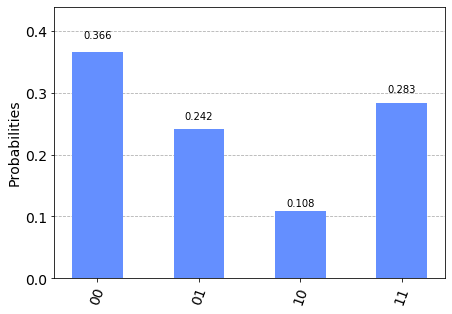

In [27]:
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [28]:
for z in device_counts:
    print(f"{b} . {z} = {bdotz(b, z)}")

11 . 00 = 0
11 . 01 = 1
11 . 11 = 0
11 . 10 = 1
